# Exercise 11
## Simulation chain for neutrino detector

In [7]:
# importing extensions
import numpy as np
import pandas as pd
import sympy as smp

from project_a2.random import Generator

smp.init_printing()

### a) Signal MC
Flow of neutrinos given by:

\begin{equation}
    \Phi(E) = \Phi_0 \cdot \left(\frac{E}{\text{TeV}}\right)^{-\gamma}
\end{equation}

Determining normalization constant $\Phi_0$:

The normalization constant has to be:


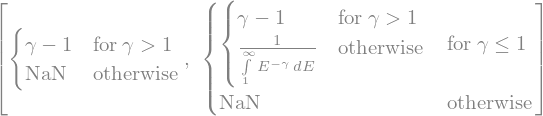

In [2]:
# calculating normalization constant phi_0
E, phi_0, phi, gamma = smp.symbols('E, phi_0, phi, gamma', real = True, positive = True)
f = phi_0*E**(-gamma)
f_int = smp.integrate(phi_0*E**(-gamma),(E, 1, smp.oo))
phi_0 = smp.solve(f_int-1, phi_0)

print(f'The normalization constant has to be:')
phi_0

As $\gamma = 2,7 > 1$,
\begin{equation}
    \Phi(E) = (\gamma-1) \cdot \left(\frac{E}{\text{TeV}}\right)^{-\gamma}
\end{equation}

Then, $u$ is given by
\begin{align}
   u &= \int_1^E \Phi(E') \text{d}E' \\
     &= \int_1^E (\gamma-1) \cdot \left(\frac{E'}{\text{TeV}}\right)^{-\gamma}\text{d}E'
\end{align}

u equals:


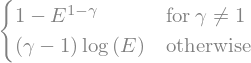

In [3]:
# calculating u
u = smp.integrate((gamma-1)*E**(-gamma), (E,1,E))
print(f'u equals:')
smp.simplify(u)

With the normalization constant $\Phi_0$ $u$ can be written as
\begin{align}
   u = 1-E^{1-\gamma}.
\end{align}

The energy $E$ is the inverse of $u$ and therefore
\begin{align}
   E = \left(1-u\right)^{\frac{1}{1-\gamma}}
\end{align}
with a normal distributed $u\in[0,1]$

In [4]:
# random generator, getting 10^5 u in [0,1]
rng = np.random.default_rng(666)

u = rng.uniform(size=10**5)

# defining function E
gamma = 2.7
def E(u):
    return (1-u)**(1/(1-gamma))

signal = pd.DataFrame({
    'Energy': E(u)
    
})

signal.head()

,Energy
0,2.339111
1,1.600574
2,1.583425
3,1.750415
4,1.278816


### b) Acceptance
The probability of detecting an event is engergy dependent with the probability
\begin{align}
   P(E)=\left(1-\text{e}^{-\frac{E}{2}}\right)^3.
\end{align}

In [5]:
# defining probability function
def P(E):
    return (1-np.e**(-E/2))**3


signal['AcceptanceMask'] = P(signal['Energy'])

signal.head()

,Energy,AcceptanceMask
0,2.339111,0.327788
1,1.600574,0.167102
2,1.583425,0.163606
3,1.750415,0.198384
4,1.278816,0.105419


Wie sollen wir von % zu True/False kommen?

### c) Polar method

In [6]:
    def standard_normal(self, size=None):
        '''
        Override standard normal with using the Marsaglia polar method

        Blatt 5, Aufgabe 11b)
        '''
        # Fügen Sie hier den Code ein um Zufallszahlen aus der
        # angegebenen Verteilung zu erzeugen

        # dummy, so the code works. Can be removed / replaced
        # values = np.zeros(size)
        
        
        x1 = np.zeros(size)
        x2 = np.zeros(size)
        
        for i in range(size):
            s = 2.
            v1 = 0.
            v2 = 0.
            while s > 1:
                u1 = self.uniform()
                u2 = self.uniform()
                v1 = 2*u1-1
                v2 = 2*u2-1
                s = v1**2+v2**2
            
            x1[i] = v1*np.sqrt(-2/s*np.log(s))
            x2[i] = v2*np.sqrt(-2/s*np.log(s))
                
        values = x1
        return values

    def normal(self, loc=0, scale=1, size=None):
        '''
        Scale and shift standard normal values

        Blatt 5, Aufgabe 11b)
        '''
        # Fügen Sie hier den Code ein um Zufallszahlen aus der
        # angegebenen Verteilung zu erzeugen

        # dummy, so the code works. Can be removed / replaced
        values = Generator.standard_normal(self, size=size)
        values = scale * values + loc
        return values

### d) Energy measurement

In [10]:
gen = Generator(seed=0)

N = gen.normal(loc=10, scale=2, size=10**5) # muss noch Ener


[11.61566617 11.39092641 10.14613877 ... 10.87369341  8.29479241
  8.49214208]
